In [155]:
import numpy as np
import pandas as pd

In [156]:
df1 = pd.read_csv('Data2.csv')
df1=df1[0:11]
df1

,Year,Gross_Weight_Of\n_Goods_Handled\n(in thousand tonnes),ShortSeaShipping_Weight\n_of_Goods_transported\n(in thousands tonnes),DeepSeaShipping_Weight_\nof_Goods_transported\n(in thousand tonnes),TotalShipping_Weight\n_of_Goods_transported\n(in thousands tonnes),Marinetime_goods_transport_performed\n(inExclusiveEconomicZoneofthecountry\n(inMillionTonne-kilometer)),Total_Vessels,Gross_tonnage_in_thousands_by_all types_of_\nvessels\n,Turnover(in thousand euros)\nin Marinetime_transport_sector,Unnamed: 9
0,2010,3034880,1618837,946958,2565795,4448441,2134012,13739816,134200,NaN
1,2011,3094060,1636150,1023042,2659192,4525844,2181926,14077937,136167,NaN
2,2012,3154395,1614816,1034662,2649478,4604594,2096398,13905003,145742,NaN
3,2013,3215906,1610880,1032035,2642915,4684714,2016989,13711175,141348,NaN
4,2014,3287210,1638403,1053376,2691779,4746385,2068414,13679852,139612,NaN
5,2015,3343755,1660535,1063441,2723976,4850032,1991274,14280662,150563,NaN
6,2016,3376704,1702834,1040279,2743113,4842221,1989123,14911085,139315,NaN
7,2017,3476076,1711477,1096029,2807506,5059154,2026259,15447891,155320,NaN
8,2018,3584537,1771398,1137964,2909362,5207869,2189422,16173588,160310,NaN
9,2019,3587258,1800469,1169011,2969480,5317875,2278469,16288379,163249,NaN


In [157]:
X = df1.drop('Unnamed: 9',axis=1)
X = X.drop('Year',axis=1)
#X = X.drop('Total_Vessels',axis=1)
#X = X.drop('Gross_tonnage_in_thousands_by_all types_of_\nvessels\n',axis=1)
X=X.drop('Turnover(in thousand euros)\nin Marinetime_transport_sector',axis=1)
#X = X.drop('ShortSeaShipping_Weight\n_of_Goods_transported\n(in thousands tonnes)',axis=1)
#X = X.drop('DeepSeaShipping_Weight_\nof_Goods_transported\n(in thousand tonnes)',axis=1)
X=X.drop('Marinetime_goods_transport_performed\n(inExclusiveEconomicZoneofthecountry\n(inMillionTonne-kilometer))',axis=1)
Y=df1['Marinetime_goods_transport_performed\n(inExclusiveEconomicZoneofthecountry\n(inMillionTonne-kilometer))']
#Y=df1['Turnover(in thousand euros)\nin Marinetime_transport_sector']
#Y=df1['Turnover(in thousand euros)\nin Marinetime_transport_sector']

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [159]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [160]:
Y_pred = model.predict(X_test)
Y_pred

array([5231581.77164871, 4757946.24360591, 4336058.57728827])

In [161]:
Y_test

9     5317875
10    5036425
0     4448441
Name: Marinetime_goods_transport_performed\n(inExclusiveEconomicZoneofthecountry\n(inMillionTonne-kilometer)), dtype: int64

In [162]:
model.score(X_test,Y_test)

0.7519760668060648

In [163]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, Y_train, cv=3)
print('Cross-Validation Scores:', cv_scores)

Cross-Validation Scores: [ 0.99619117 -0.16810617  0.98345486]


In [164]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients['Absolute_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)
print(coefficients)

                                             Feature  Coefficient  \
2  DeepSeaShipping_Weight_\nof_Goods_transported\...     1.389849   
1  ShortSeaShipping_Weight\n_of_Goods_transported...    -1.146702   
0  Gross_Weight_Of\n_Goods_Handled\n(in thousand ...     1.002338   
3  TotalShipping_Weight\n_of_Goods_transported\n(...     0.243147   
4                                      Total_Vessels    -0.115669   
5  Gross_tonnage_in_thousands_by_all types_of_\nv...     0.062806   

   Absolute_Coefficient  
2              1.389849  
1              1.146702  
0              1.002338  
3              0.243147  
4              0.115669  
5              0.062806  


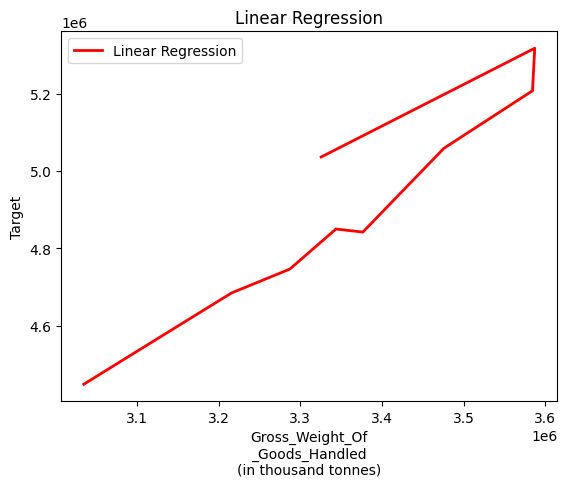

In [165]:
import matplotlib.pyplot as plt
plt.plot(X['Gross_Weight_Of\n_Goods_Handled\n(in thousand tonnes)'], Y, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Gross_Weight_Of\n_Goods_Handled\n(in thousand tonnes)')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

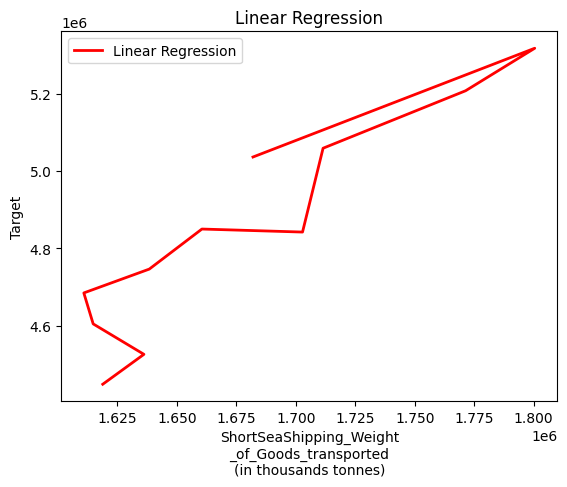

In [166]:
import matplotlib.pyplot as plt
plt.plot(X['ShortSeaShipping_Weight\n_of_Goods_transported\n(in thousands tonnes)'], Y, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('ShortSeaShipping_Weight\n_of_Goods_transported\n(in thousands tonnes)')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

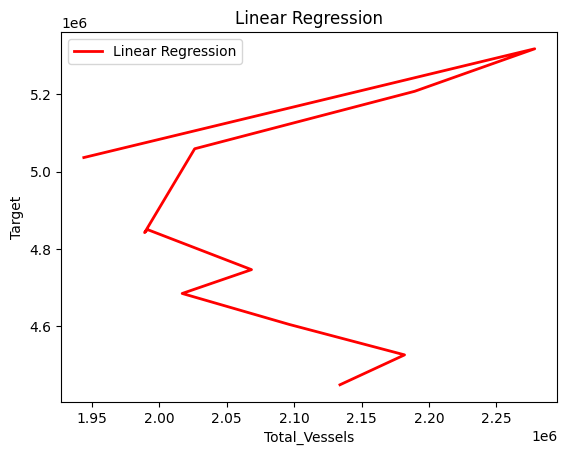

In [167]:
import matplotlib.pyplot as plt
plt.plot(X['Total_Vessels'], Y, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Total_Vessels')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

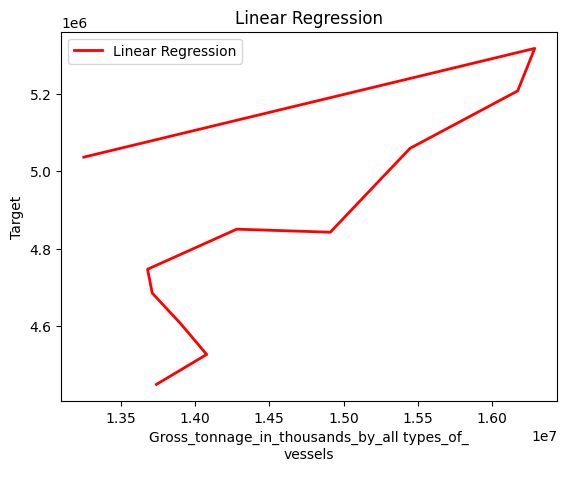

In [168]:
import matplotlib.pyplot as plt
plt.plot(X['Gross_tonnage_in_thousands_by_all types_of_\nvessels\n'], Y, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Gross_tonnage_in_thousands_by_all types_of_\nvessels\n')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [169]:
from sklearn.svm import SVC
model2=SVC(kernel='linear',gamma='auto')
model2.fit(X_train,Y_train)

SVC(gamma='auto', kernel='linear')

In [170]:
Y_pred=model2.predict(X_test)
Y_pred

array([5207869, 4746385, 4604594], dtype=int64)

In [171]:
model2.score(X_test,Y_test)

0.0

In [172]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=10, random_state=42)
model3.fit(X_train,Y_train)
model3.score(X_test,Y_test)

0.0

In [173]:
from sklearn import tree
model3=tree.DecisionTreeClassifier()
model3.fit(X_train,Y_train)
model3.score(X_test,Y_test)

0.0